In [16]:
# load neccessary packages
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

In [2]:
# load the data
CLEAN_DATAFILE = "BDP_CLEAN.csv"
df = pd.read_csv(CLEAN_DATAFILE)

# lets drop the columns we dont want to predict on
# these columns are only for identification
drop_columns = ['Ticker', 'Rating Date', 'Fiscal Year']
y_variable = "RTG_SP_LT_LC_ISSUER_CREDIT"
df = df.drop(columns=drop_columns)
x = df.drop(columns=[y_variable])
y = df[y_variable]

# within the x variables there are 2 columns that are categorical data
# lets one hot encode the categorical data
x = pd.get_dummies(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

This project is a classification problem where we want to predict the column "RTG_SP_LT_LC_ISSUER_CREDIT".

One interesting application for this problem is to use a model to predict the credit rating of the issuer and then compare this to the assigned credit rating given by a credit rating agency. This would allow us to expose possible opportunities where the assigned credit rating is low but our model assigns a high credit rating. The bonds issued would be seen as high risk high reward but in reality we know that the risk is less than expected.

# Tree based models

### NOTE: If the optimal parameters have been printed for any of the models, DO NOT RUN AGAIN. It takes a long ass time for each one to run. Just add another cell below and create a new model object with the optimal parameters plugged in.

## Random Forest

In [4]:
# find the best parameters first
# random forest parameters
kFold = 5
param_grid = {'n_estimators': np.arange(200, 800, 100),
                'max_features': np.array(['auto', 'sqrt', 'log2']),
                'max_depth': np.arange(5, 30, 5)}
forest_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=kFold)

# test using training data
forest_grid.fit(x_train, y_train)
best_n = forest_grid.best_params_['n_estimators']
best_f = forest_grid.best_params_['max_features']
best_d = forest_grid.best_params_['max_depth']

print("Best n estimators:   %f" % best_n)
print("Best max features:   %s" % best_f)
print("Best max depth:      %f" % best_d)

/Users/maxliu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best n estimators:   600.000000
Best max features:   log2
Best max depth:      25.000000


In [5]:
# use the best parameters to test accuracy on test set
# look through GridSearchCV results and make some graphs
# TODO: make graphs using the results, make confusion matrix
# TODO: check the accuracy of the model on the test set
forest_score = forest_grid.score(x_test, y_test)
print("Accuracy of random forest on test set: %f" % forest_score)

Accuracy of random forest on test set: 0.451757


In [6]:
forest_grid.cv_results_

/Users/maxliu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/maxliu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/maxliu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/maxliu/anaconda3/lib/py

{'mean_fit_time': array([ 1.12280078,  1.67593136,  2.20506244,  2.77671399,  3.35639668,
         3.89179745,  1.12203803,  1.67102256,  2.23869977,  2.78067155,
         3.32290626,  3.89660592,  0.71429582,  1.06808982,  1.43182716,
         1.77147336,  2.1198658 ,  2.48751469,  2.05964365,  3.07062674,
         4.09888101,  5.10210662,  6.12531676,  7.14416337,  2.04827676,
         3.06783805,  4.11261821,  5.1225894 ,  6.13118939,  7.15232167,
         1.26190186,  1.89860811,  2.5150578 ,  3.13942642,  3.78289847,
         4.38393874,  2.90761142,  4.35976353,  5.80418983,  7.25506396,
         8.59597387,  9.77344799,  2.78141603,  4.168611  ,  5.5496191 ,
         6.94913445,  8.33589177,  9.72304778,  1.76905632,  2.64089651,
         3.51985207,  4.41988912,  5.28815627,  6.14342828,  3.15169444,
         4.7333343 ,  6.31393671,  7.90221672,  9.44220653, 11.03029823,
         3.17090664,  4.7290298 ,  6.27974043,  7.82505088,  9.3848453 ,
        11.04805765,  2.15538883, 

In [10]:
# fit a random forest classifier using the best parameters
# I want to graph and view what the top predictors are
# TODO: graph the top predictors
rf = RandomForestClassifier(n_estimators=600, max_features='log2', max_depth=25)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
var_names = list(x_train)
var_scores = rf.feature_importances_

var_selection = dict(zip(var_names, var_scores))
var_selection = OrderedDict(sorted(var_selection.items(), key=lambda t: t[1]))

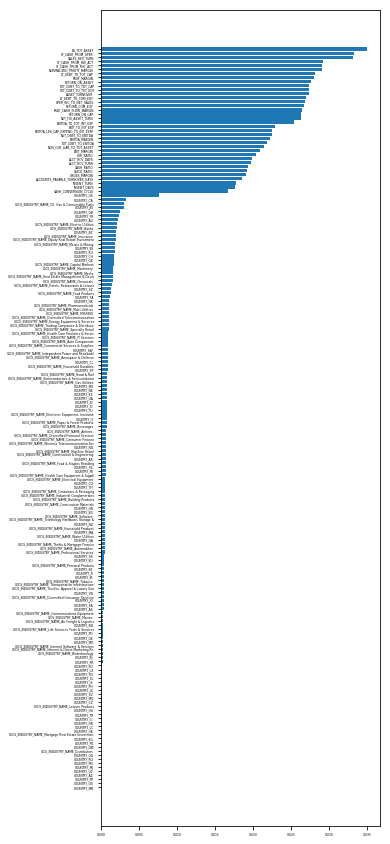

In [19]:
plt.rcParams.update({'font.size':3})
plt.figure(figsize=(5, 15))
plt.barh(range(len(var_selection)), list(var_selection.values()), align='center')
plt.yticks(range(len(var_selection)), list(var_selection.keys()))
plt.show()

## Adaboost

In [ ]:
# find the best parameters first
kFold = 5
param_grid = {'n_estimators': np.arange(200, 900, 100),
                'learning_rate': np.arange(0.25, 1.25, 0.25)}
adaboost_grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=kFold)

# test using training data
adaboost_grid.fit(x_train, y_train)
best_n = adaboost_grid.best_params_['n_estimators']
best_l = adaboost_grid.best_params_['learning_rate']

print("Best n estimators:    %f" % best_n)
print("Best learning rate:   %f" % best_l)

In [ ]:
# TODO: make graphs using the results, make confusion matrix
# TODO: check the accuracy of the model on the test set

## Gradientboosting

In [ ]:
# find the best parameters first
kFold = 5
param_grid = {'n_estimators': np.arange(200, 800, 100),
                'learning_rate': np.arange(0.25, 1.25, 0.25),
                'max_depth': np.arange(5, 30, 5)}
gradient_grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=kFold)

# test using training data
gradient_grid.fit(x_train, y_train)
best_n = gradient_grid.best_params_['n_estimators']
best_l = gradient_grid.best_params_['learning_rate']
best_d = gradient_grid.best_params_['max_depth']

print("Best n estimators:    %f" % best_n)
print("Best learning rate:   %f" % best_l)
print("Best max depth:       %f" % best_d)

In [ ]:
# TODO: make graphs using the results, make confusion matrix
# TODO: check the accuracy of the model on the test set